In [16]:
import torch
import numpy as np
import cupy as cp
import pyfftw
import matplotlib.pyplot as plt
import time


In [17]:
print('PyTorch: {}'.format(torch.__version__))
print('Numpy: {}'.format(np.__version__))
print('CuPy: {}'.format(cp.__version__))
print('pyFFTW: {}'.format(pyfftw.__version__))

PyTorch: 1.7.0+cu110
Numpy: 1.19.2
CuPy: 8.1.0
pyFFTW: 0.12.0


In [18]:
def torch_ifft_fft(data):
    signal_ndim = 2
    data2 = torch.fft(data, signal_ndim=signal_ndim)
    return torch.ifft(data2, signal_ndim=signal_ndim)

def np_ifft2_fft2(data):
    data2 = np.fft.fft2(data)
    return np.fft.ifft2(data2)

def cp_ifft2_fft2(data):
    data2 = cp.fft.fft2(data)
    return cp.fft.ifft2(data2)

def pyfftw_ifft2_fft2(data):
    data2 = pyfftw.interfaces.numpy_fft.fft2(data)
    return pyfftw.interfaces.numpy_fft.ifft2(data2)

PyTorch CPU

In [19]:
name = 'PyTorch\nCPU'
device_type = 'cpu'
device = torch.device(device_type)
names.append(name)
torchtimes = []
datas = [torch.randn((x,x,2), device=device) for x in sizes]
print(f'Working on device: {datas[0].device}')
for x, data in zip(sizes, datas):
    print('{} {}x{}'.format(" ".join(name.split('\n')), x, x))
    t = %timeit -o torch_ifft_fft(data)
    torchtimes.append(t)
totaltimes.append(torchtimes)

Working on device: cpu
PyTorch CPU 512x512
4.69 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
PyTorch CPU 1024x1024
21.2 ms ± 673 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
PyTorch CPU 2048x2048
99.2 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
PyTorch CPU 4096x4096
469 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


PyTorch GPU

In [6]:
sizes = [512, 1024, 2048, 4096] # X * X pixel arrays/tensors
names = []
totaltimes = []
name = 'PyTorch\nGPU'
device_type = 'cuda'
device = torch.device('cuda:{}'.format(0))
names.append(name)
print('{} available: {}'.format(name, torch.cuda.is_available()))
torchtimes = []
datas = [torch.randn(size=(x,x,2), device=device) for x in sizes]
print(f'Working on device: {datas[0].device}')
for x, data in zip(sizes, datas):
    print('{} {}x{}'.format(" ".join(name.split('\n')), x, x))
    start = time.process_time()
    t = %timeit -o torch_ifft_fft(data)
    #torch_ifft_fft(data)
    #end = time.process_time()
    #t=end-start
    torchtimes.append(t)
totaltimes.append(torchtimes)

PyTorch
GPU available: True
Working on device: cuda:0
PyTorch GPU 512x512
283 µs ± 547 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
PyTorch GPU 1024x1024
1.09 ms ± 957 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
PyTorch GPU 2048x2048
5.76 ms ± 55.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
PyTorch GPU 4096x4096
10.2 ms ± 6.87 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Numpy CPU

In [9]:
name = 'Numpy\nCPU'
names.append(name)
nptimes = []
datas = [np.random.normal(size=(x,x)).astype('complex128') for x in sizes]
for x, data in zip(sizes, datas):
    print('{} {}x{}'.format(" ".join(name.split('\n')), x, x))
    t = %timeit -o np_ifft2_fft2(data)
    nptimes.append(t)
totaltimes.append(nptimes)

Numpy CPU 512x512
40.8 ms ± 295 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Numpy CPU 1024x1024
271 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Numpy CPU 2048x2048
1.34 s ± 39.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Numpy CPU 4096x4096
7.93 s ± 61.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


CuPy GPU

In [10]:
name = 'CuPy\nGPU'
names.append(name)
cptimes = []
device = cp.cuda.Device(0)
with device:
    datas = [cp.random.normal(size=(x,x)).astype('complex128') for x in sizes]
    for x, data in zip(sizes, datas):
        print('{} {}x{}'.format(" ".join(name.split('\n')), x, x))
        t = %timeit -o cp_ifft2_fft2(data)
        cptimes.append(t)
    totaltimes.append(cptimes)

CuPy GPU 512x512
1.18 ms ± 5.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy GPU 1024x1024
5.09 ms ± 34.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy GPU 2048x2048
The slowest run took 4.11 times longer than the fastest. This could mean that an intermediate result is being cached.
9.51 ms ± 6.73 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
CuPy GPU 4096x4096
The slowest run took 4.26 times longer than the fastest. This could mean that an intermediate result is being cached.
39.4 ms ± 28.9 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


PyFFTW CPU

In [43]:
name = 'PyFFTW\nCPU'
names.append(name)
tensortimes = []
def pyfftw_array(shape):
    arr = pyfftw.empty_aligned(shape, dtype='complex128')
    arr[:] = np.random.normal(size=shape) + 1j*np.random.normal(size=shape)
    return arr
datas = [pyfftw_array((x,x)) for x in sizes]
for x, data in zip(sizes, datas):
    print('{} {}x{}'.format(" ".join(name.split('\n')), x, x))
    t = %timeit -o pyfftw_ifft2_fft2(data)
    tensortimes.append(t)
totaltimes.append(tensortimes)

PyFFTW CPU 512x512
91 ms ± 756 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
PyFFTW CPU 1024x1024
628 ms ± 4.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
PyFFTW CPU 2048x2048
3.24 s ± 159 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
PyFFTW CPU 4096x4096
16.6 s ± 115 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Plotting results
Plot as function of data shape

ValueError: shape mismatch: objects cannot be broadcast to a single shape

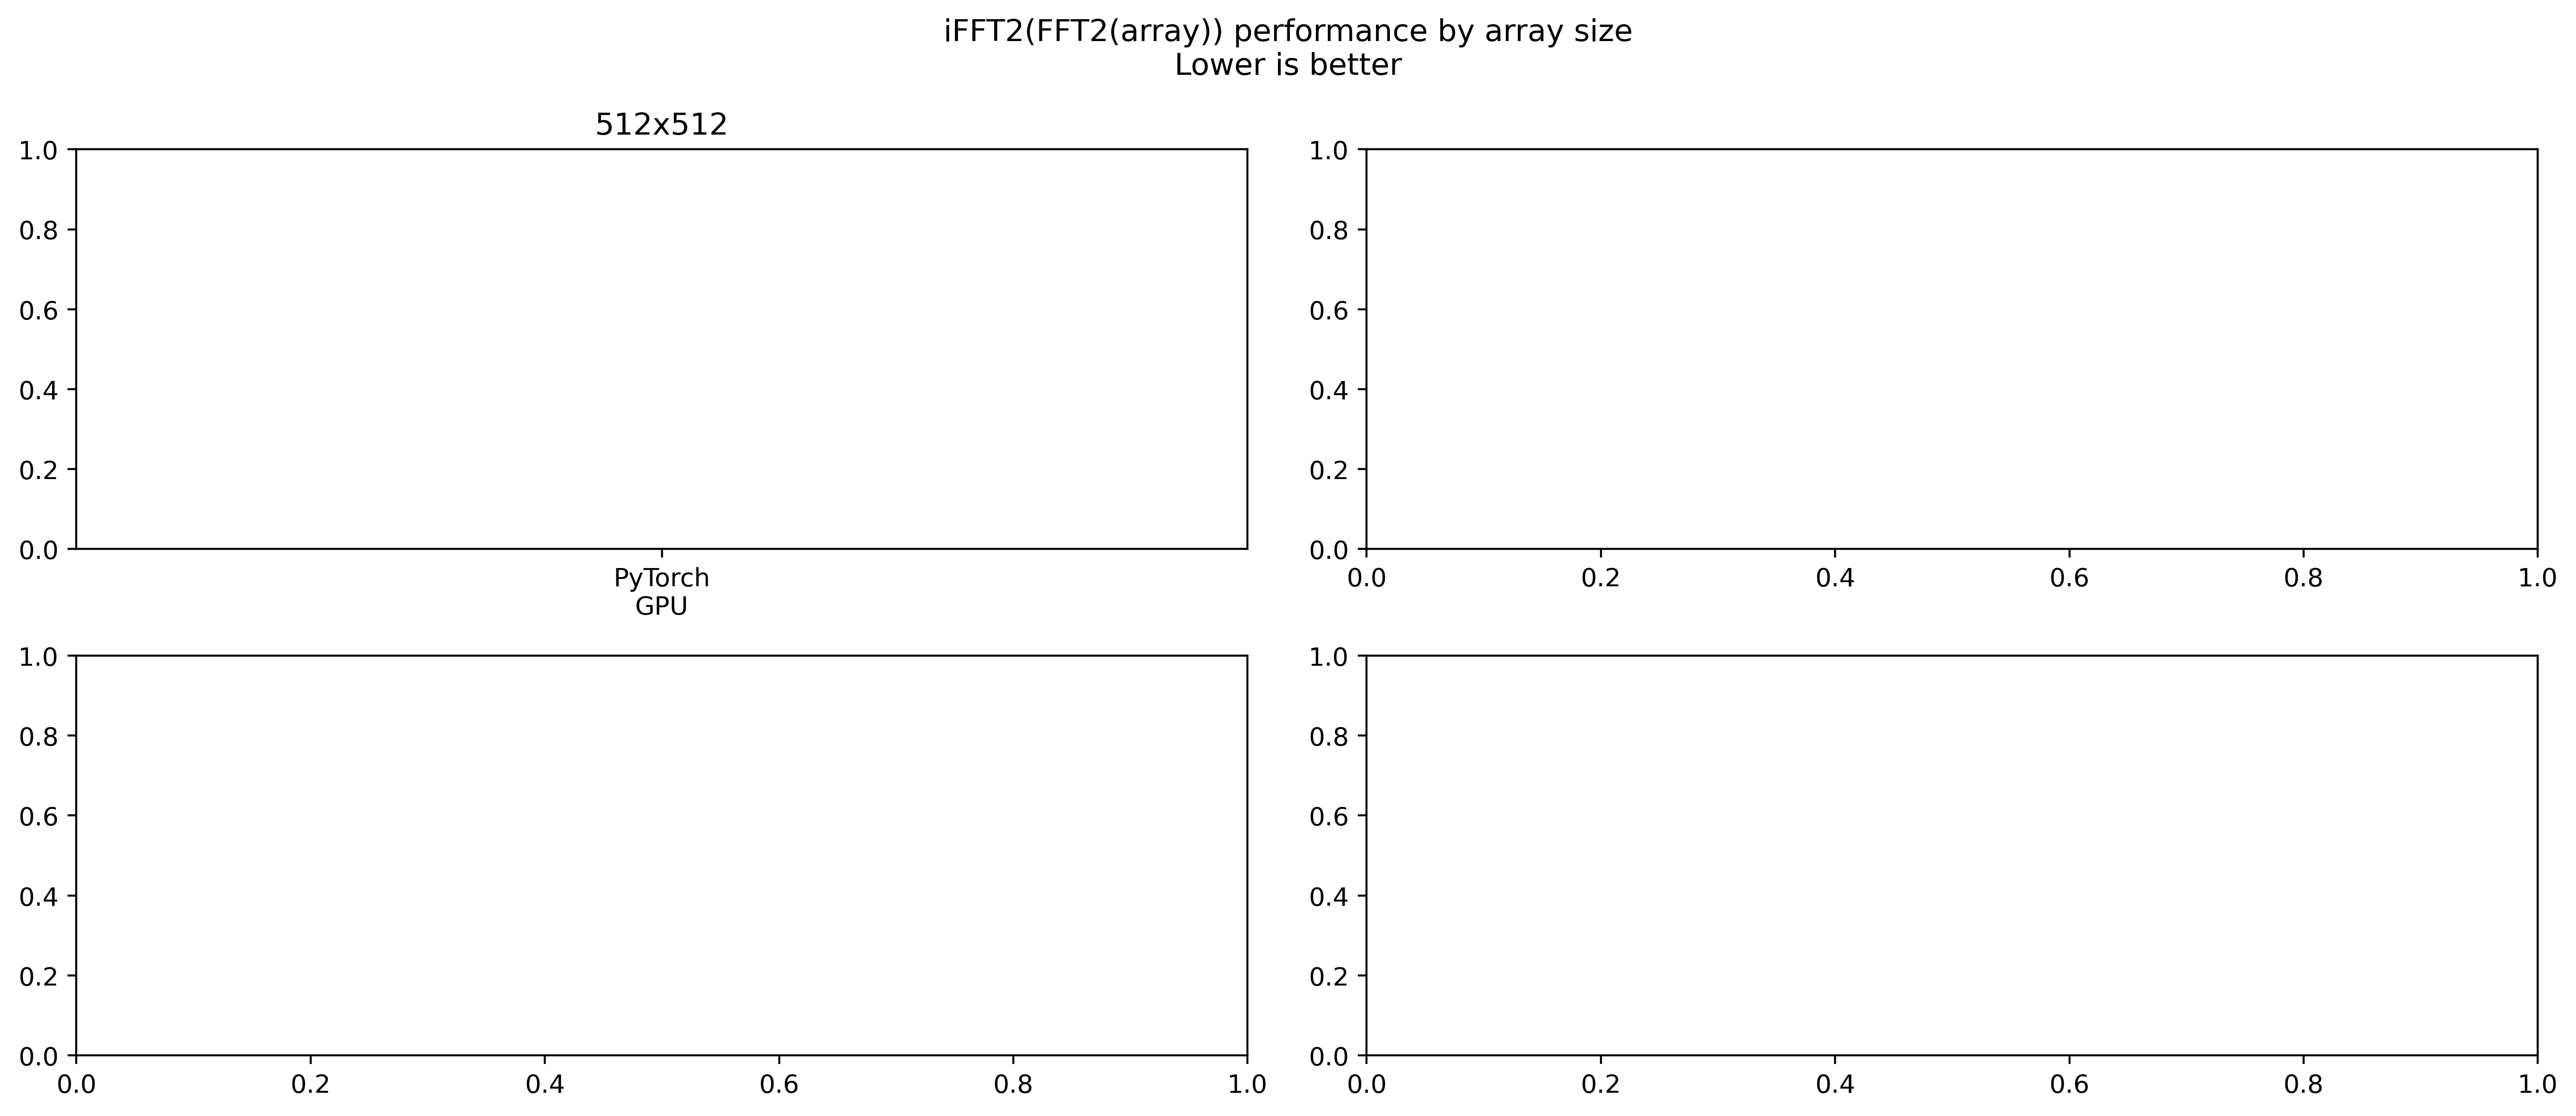

In [13]:
fig, AX = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(14,6), dpi=400)
# fig.canvas.layout.width = "1400px"
# fig.canvas.layout.height = "600px"
plt.suptitle('iFFT2(FFT2(array)) performance by array size\nLower is better')

for i in range(len(sizes)):
    t = np.array([time[i].average for time in totaltimes]) * 1000 # now in ms
    err = np.array([time[i].stdev for time in totaltimes]) * 1000
    ax = AX.flatten()[i]
    ax.set_title("{}x{}".format(sizes[i], sizes[i]))
    ax.bar(names, t)
    ax.set_yscale('log')
    ax.set_ylabel('FFT Time (ms)')
plt.savefig('FFT_Speed_by_size.png')

Average times (in ms) for a 4k x 4k array

In [14]:
times_4k = np.array([time[-1].average for time in totaltimes]) * 1000
for i in range(len(names)):
    print(" ".join(names[i].split('\n')))
    print(round(times_4k[i], 2))
    
pytorch_time_4k = times_4k[3] 
    
print()
print('4k x 4k iFFT2(FFT2())')
print('PyTorch faster than others by a factor of ')
times_4k = np.array([time[-1].average for time in totaltimes]) * 1000
for i in range(len(names)):
    print(" ".join(names[i].split('\n')))
    print(round(times_4k[i]/pytorch_time_4k, 2))

PyTorch GPU
10.18
CuPy GPU
39.45
CuPy GPU
95.29
Numpy CPU
7932.03
CuPy GPU
39.37
PyTorch CPU
444.86
PyTorch CPU


IndexError: index 6 is out of bounds for axis 0 with size 6

Plot as function of software

IndexError: list index out of range

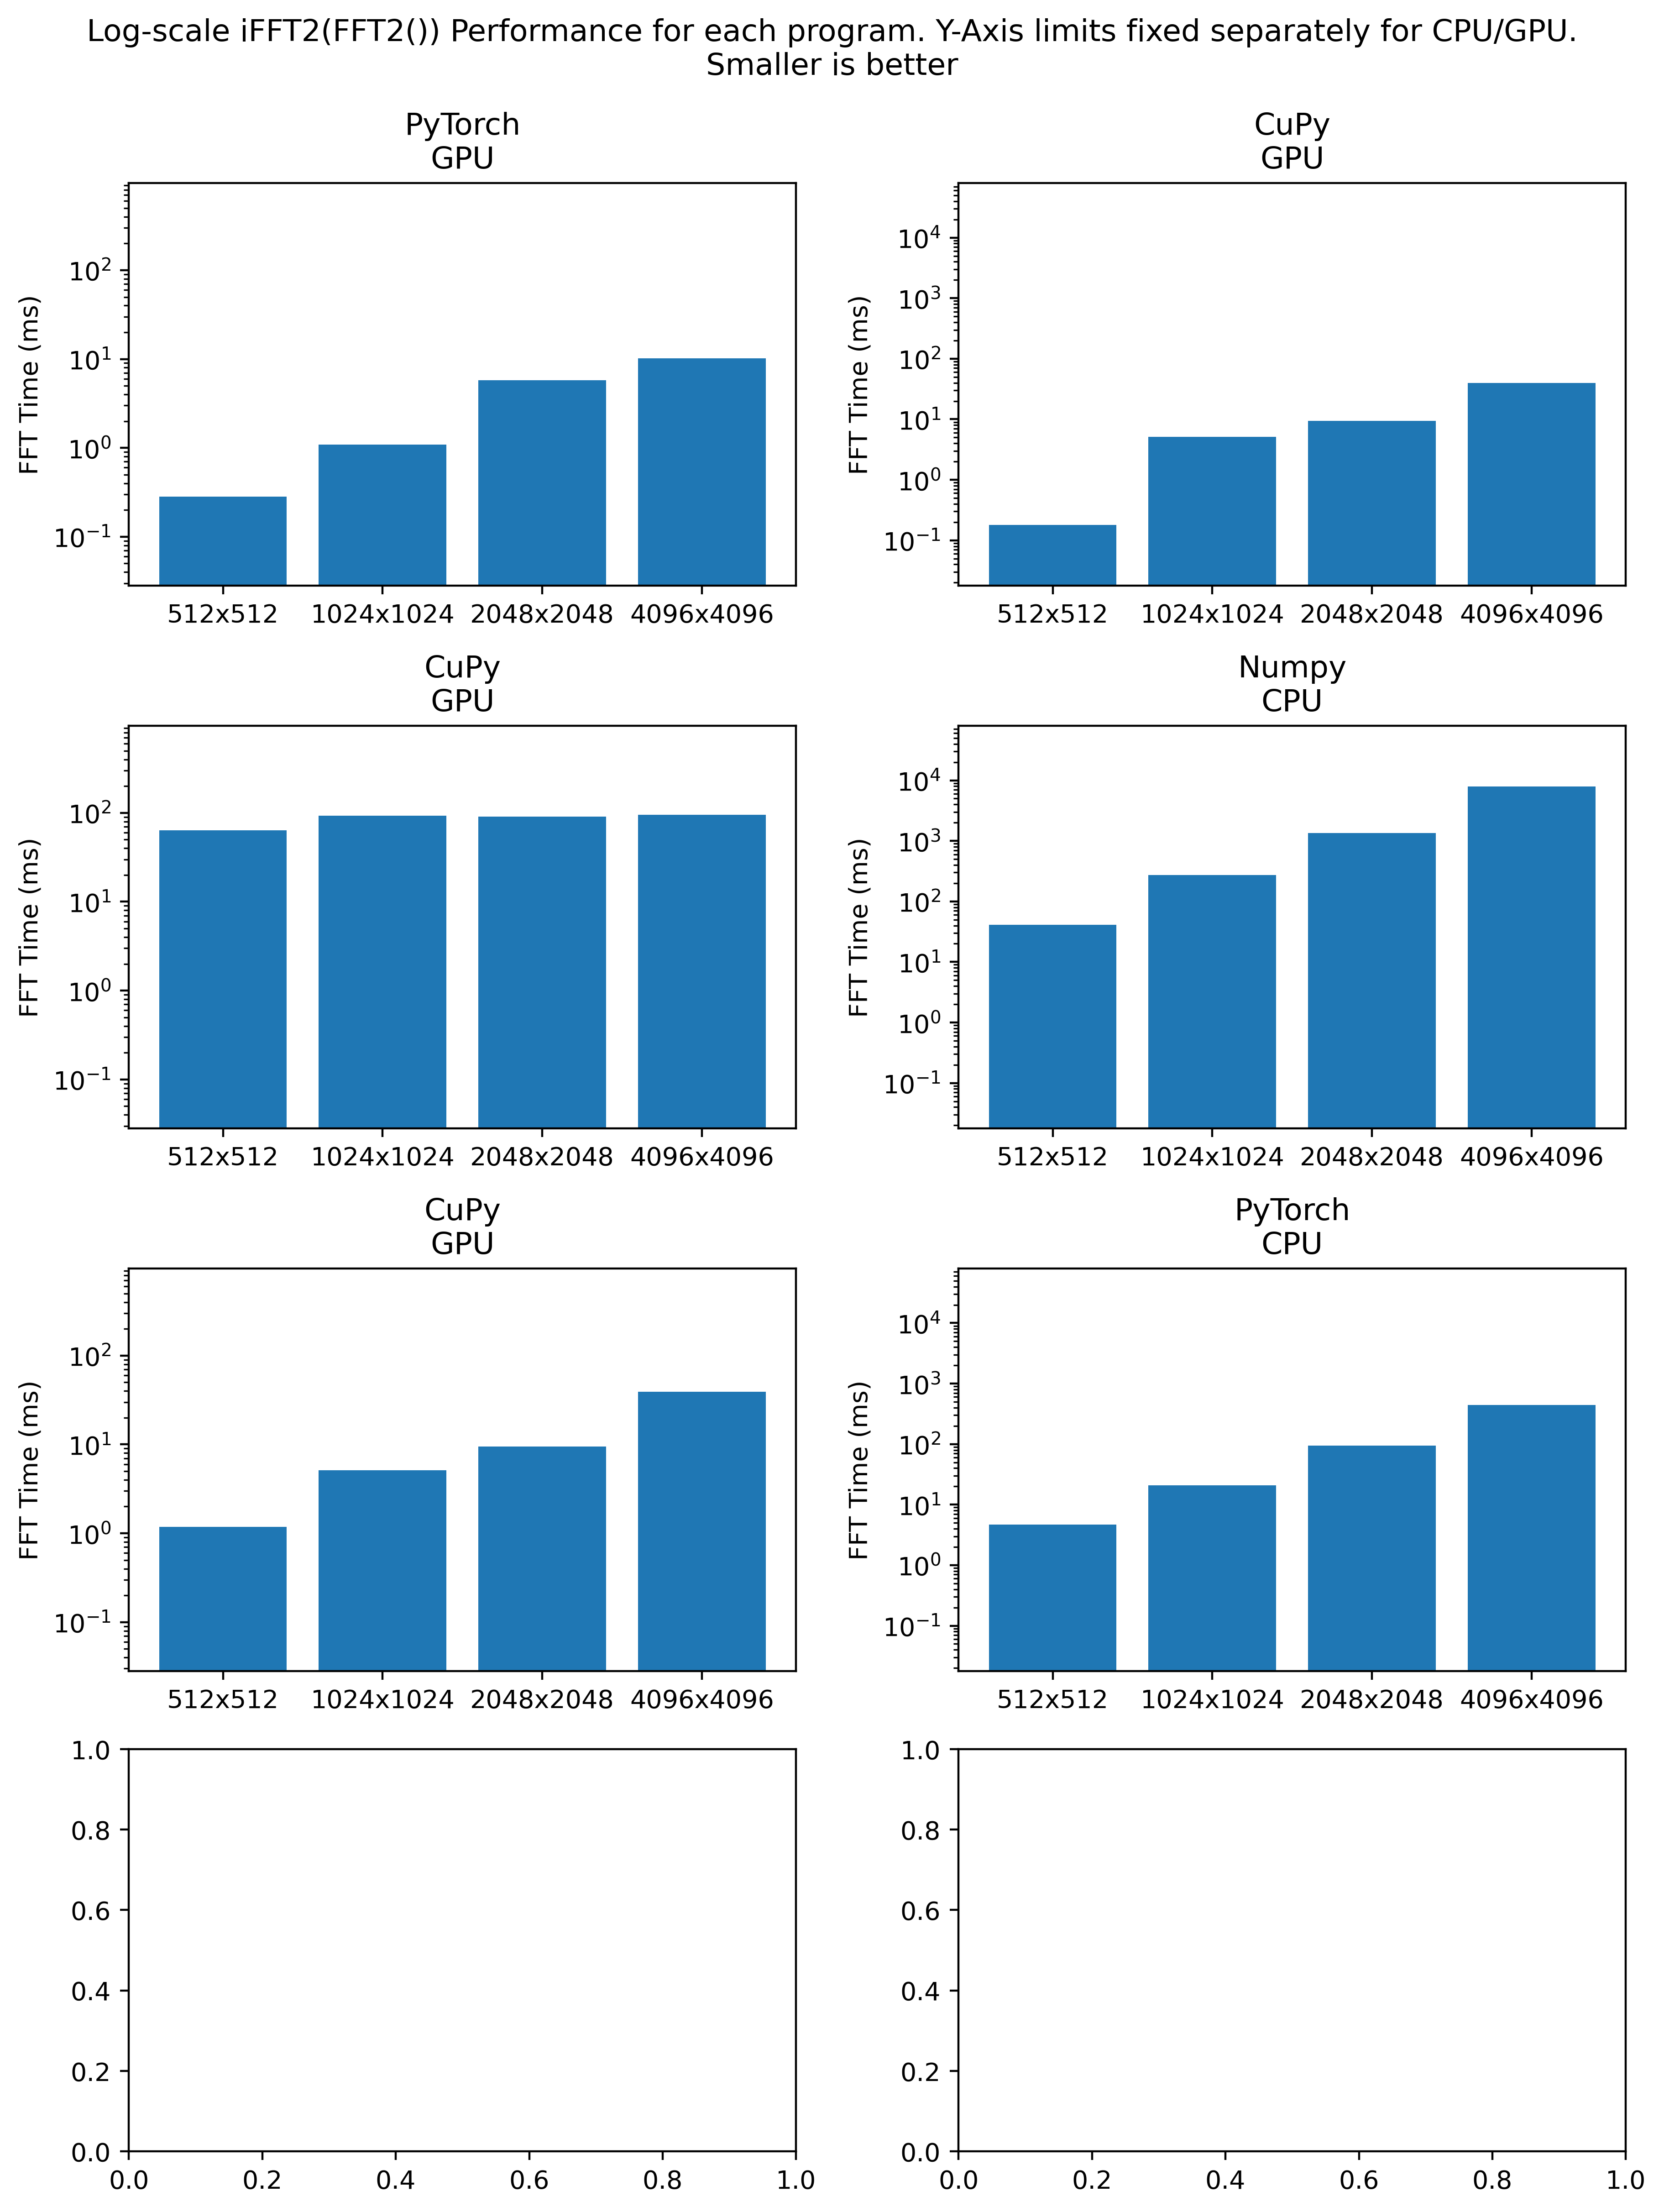

In [15]:
# Log scale
fig, AX = plt.subplots(ncols=2, nrows=4, constrained_layout=True, figsize=(9,12), dpi=400)
# fig.canvas.layout.width = "1300px"
# fig.canvas.layout.height = "1000px"
cputimes = [1000 * time.average for times in totaltimes[::2] for time in times]
gputimes = [1000 * time.average for times in totaltimes[1::2] for time in times]

gmx, gmn = max(gputimes), min(gputimes)
cmx, cmn = max(cputimes), min(cputimes)
plt.suptitle('Log-scale iFFT2(FFT2()) Performance for each program. Y-Axis limits fixed separately for CPU/GPU.\nSmaller is better')

for i in range(len(names)):
    t = np.array([time.average for time in totaltimes[i]]) * 1000 # now in ms
    ax = AX.flatten()[i]
    ax.set_title(names[i])
    sizes_title = ["{}x{}".format(size, size) for size in sizes]
    ax.bar(sizes_title, t)
    ax.set_yscale('log')
    if i % 2:
        ax.set_ylim(gmn/10, gmx*10)
    else:
        ax.set_ylim(cmn/10, cmx*10)
    ax.set_ylabel('FFT Time (ms)')
AX.flatten()[-1].remove()